<a href="https://colab.research.google.com/github/ksn056/-_Additional_Data-Science-With-Python/blob/master/MNIST_FASHION_ANN_%26_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Images of Clothing**
1. **ANN Model For Fassion MNIST**
2. **CNN Model For Fassion MNIST**

# **ANN Model For Fassion MNIST**

In [61]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [62]:
X_train.shape

(60000, 28, 28)

In [63]:
X_test.shape

(10000, 28, 28)

In [64]:
Y_train.shape

(60000,)

In [65]:
Y_test.shape

(10000,)

In [66]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

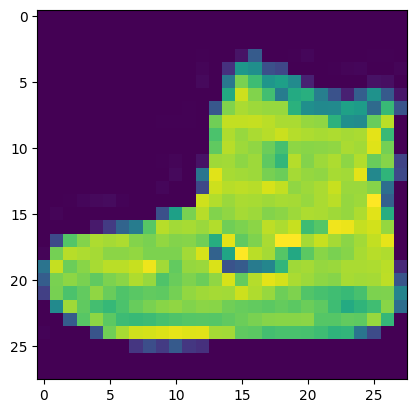

In [67]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [68]:
Y_train[0]

np.uint8(9)

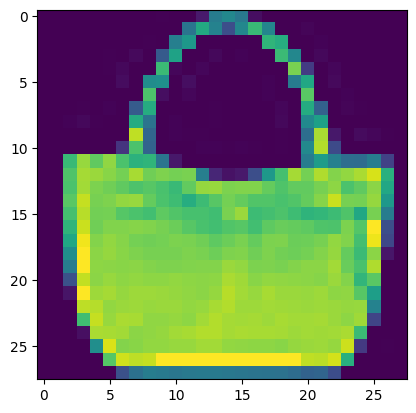

In [69]:
plt.imshow(X_train[100])

In [70]:
Y_train[100]

np.uint8(8)

In [71]:
X_train=X_train/255.0
X_test=X_test/255.0

# Reshape the input data to be flat (784 features)
X_train_df = X_train.reshape(X_train.shape[0], 784)
X_test_df = X_test.reshape(X_test.shape[0], 784)

In [72]:
ann_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_history = ann_model.fit(X_train_df,Y_train, epochs=10, validation_data=(X_test_df, Y_test))

# ANN Predictions
y_pred_ann = np.argmax(ann_model.predict(X_test_df), axis=1)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7802 - loss: 0.6328 - val_accuracy: 0.8512 - val_loss: 0.4100
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8635 - loss: 0.3743 - val_accuracy: 0.8615 - val_loss: 0.3880
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8738 - loss: 0.3398 - val_accuracy: 0.8629 - val_loss: 0.3775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.3108 - val_accuracy: 0.8666 - val_loss: 0.3644
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8912 - loss: 0.2920 - val_accuracy: 0.8729 - val_loss: 0.3544
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8956 - loss: 0.2781 - val_accuracy: 0.8756 - val_loss: 0.3425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9015 - loss: 0.2594 - val_accuracy: 0.8773 - val_loss: 0.3473
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9039 - loss: 0.2566 - 

In [51]:
y_pred_ann.shape

(10000,)

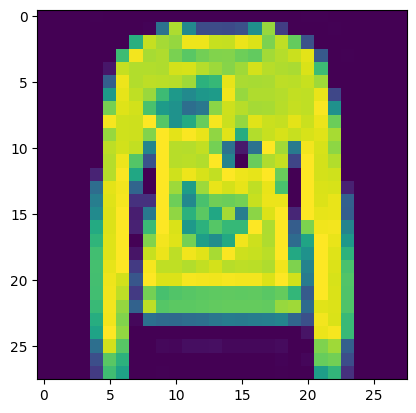

In [52]:
plt.imshow(X_test[5000])

In [53]:
Y_test[5000]

np.uint8(2)

In [54]:
y_pred_ann[5000]

np.int64(2)

0
6


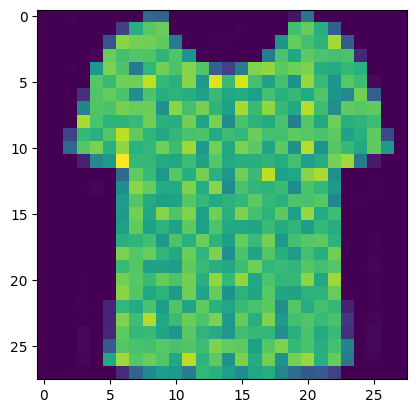

In [55]:
plt.imshow(X_test[1000])
print(Y_test[1000])
print(y_pred_ann[1000])

8
8


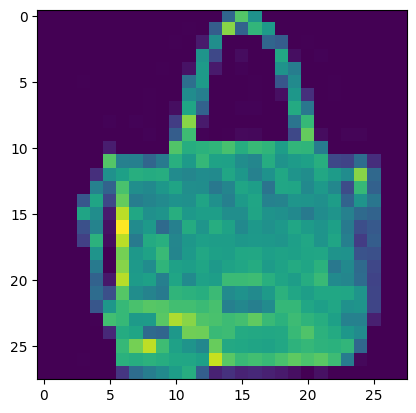

In [56]:
plt.imshow(X_test[2000])
print(Y_test[2000])
print(y_pred_ann[2000])

1
1


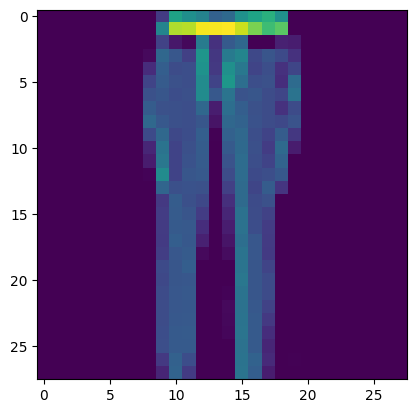

In [57]:
plt.imshow(X_test[6000])
print(Y_test[6000])
print(y_pred_ann[6000])

In [60]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


print("\n📌 ANN Classification Report:")

print(classification_report(Y_test, y_pred_ann, target_names=class_names))


📌 ANN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.81      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.79      0.79      1000
       Dress       0.85      0.92      0.88      1000
        Coat       0.84      0.71      0.77      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.66      0.76      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



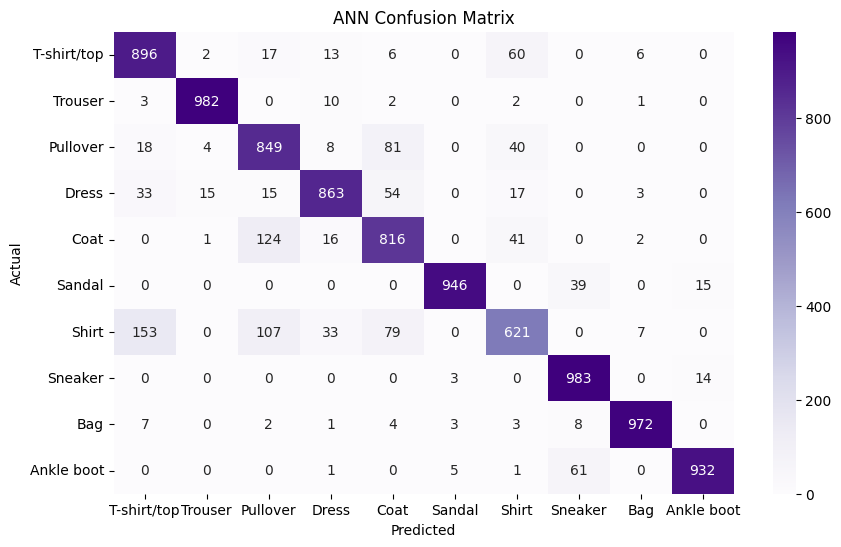

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test, y_pred_ann), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Purples')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

In [84]:
report_ann = classification_report(Y_test, y_pred_ann, target_names=class_names, output_dict=True)
overall_accuracy_ann = report_ann['accuracy']

print("\Overall Accuracy (ANN):",overall_accuracy_ann)

\Overall Accuracy (ANN): 0.886


In [83]:
# ANN Evaluation
train_acc_ann = ann_model.evaluate(X_train_df, Y_train, verbose=0)[1]
test_acc_ann = ann_model.evaluate(X_test_df, Y_test, verbose=0)[1]


print("\n ANN Train Accuracy:", train_acc_ann)
print("\n Test Accuracy:",test_acc_ann)


 ANN Train Accuracy: 0.9196333289146423

 Test Accuracy: 0.8859999775886536


# **CNN Model For Fassion MNIST**

In [107]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


X_train=X_train/255.0
X_test=X_test/255.0


cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train,Y_train, epochs=10, validation_data=(X_test, Y_test))

# CNN Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

# CNN Evaluation
train_acc_cnn = cnn_model.evaluate(X_train, Y_train, verbose=0)[1]
test_acc_cnn = cnn_model.evaluate(X_test, Y_test, verbose=0)[1]


print("\n ANN Train Accuracy:", train_acc_ann)
print("\n Test Accuracy:",test_acc_ann)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7795 - loss: 0.6144 - val_accuracy: 0.8734 - val_loss: 0.3444
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8897 - loss: 0.3022 - val_accuracy: 0.8775 - val_loss: 0.3319
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9044 - loss: 0.2561 - val_accuracy: 0.8965 - val_loss: 0.2788
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9167 - loss: 0.2233 - val_accuracy: 0.8909 - val_loss: 0.2932
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9291 - loss: 0.1919 - val_accuracy: 0.9010 - val_loss: 0.2598
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9355 - loss: 0.1731 - val_accuracy: 0.9067 - val_loss: 0.2555
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9450 - loss: 0.1461 - val_accuracy: 0.9070 - val_loss: 0.2657
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9500 - loss: 0.13

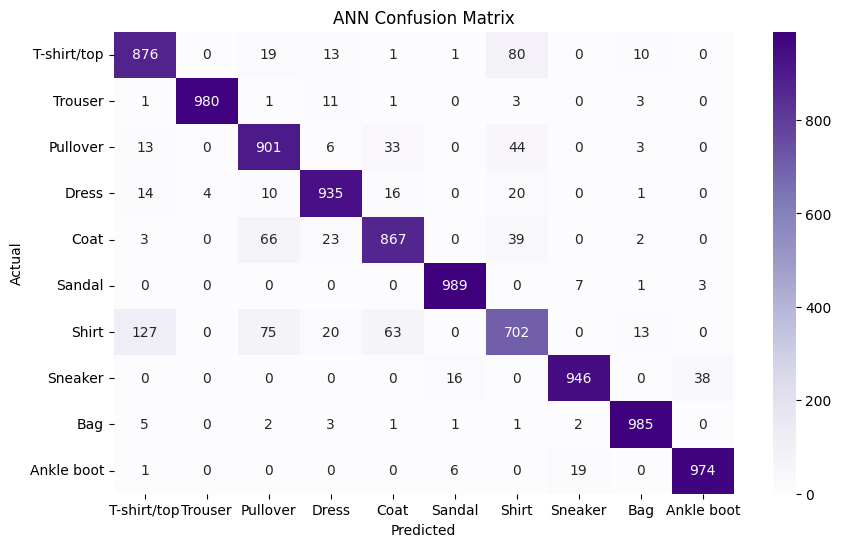

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test, y_pred_cnn), annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Purples')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

In [110]:
report_cnn = classification_report(Y_test, y_pred_cnn, target_names=class_names, output_dict=True)
overall_accuracy_ann = report_cnn['accuracy']

print("\Overall Accuracy (ANN):",overall_accuracy_ann)

\Overall Accuracy (ANN): 0.9155


##**ANN Overall Accuracy 88.55 %**
##**CNN Overall Accuracy 91.55 %**